<font color=green>
============================================================================================================ <br>
Project Goals from Codecademy: <br>
You will create a linear regression model that predicts the outcome for a tennis player based on
their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, y
ou will determine what it takes to be one of the best tennis players in the world.
https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals
============================================================================================================ <br>
</font> 

In [1]:
# Let's start off by importing some of the libraries we will need to analyze this data:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<font color = green>
============================================================================================================ <br>
Codecademy Prompt 1: “Game, Set, Match!” <br>
No three words are sweeter to hear as a tennis player than those, which indicate that a player has
beaten their opponent. While you can head down to your nearest court and aim to overcome your
challenger across the net without much practice, a league of professionals spends day and night,
month after month practicing to be among the best in the world. Today you will put your linear
regression knowledge to the test to better understand what it takes to be an all-star tennis player. <br>
Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the
ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over
the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year
include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load
the csv into a DataFrame and investigate it to gain familiarity with the data. 
=============================================================================================================
</font>

In [2]:
# Alright. Let's read in the data and print out the information of the resulting DataFrame:

tennis_stats = pd.read_csv('tennis_stats.csv')

print(tennis_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

At least there are no null entries anywhere in this table!

<font color = green>
    ============================================================================================================ <br>
Codecademy Prompt 2: Exploratory Analysis <br>
Perform exploratory analysis on the data by plotting different features against the different outcomes.
What relationships do you find between the features and outcomes? Do any of the features seem to
predict the outcomes?
============================================================================================================ <br>
</font>
First, let's define outcomes. We will try to find what all seems to be correlated with wins, winnings, and rankings. <br>
In order to prevent a lot of unnessary typing, we should write a function that takes in what you want to plot as arguments and then goes ahead and plots those columns. I am hard-coding the DataFrame name, as well as the type of plot to be produced.

In [3]:
def plottwothings(hori_value, vert_value):
    x = tennis_stats[hori_value]
    y = tennis_stats[vert_value]
    
    plt.figure(figsize=(6,6))
    ax = plt.subplot()
    
    plt.scatter(x,y)
    plt.title('{} vs. {}'.format(hori_value,vert_value))
    plt.xlabel(hori_value)
    plt.ylabel(vert_value)
    if vert_value == 'Ranking':
        ax.set_ylim(1400,0)

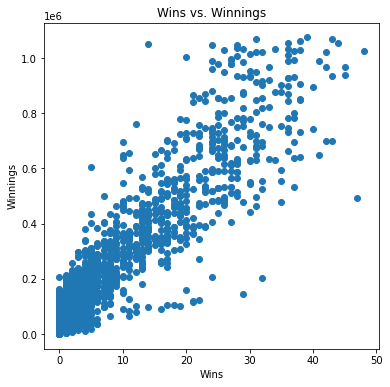

In [4]:
'''
 Now let's look at each of the columns in the tennis_stats DataFrame to see what seems to be correlated with Wins,
 Winnings, and Ranking:
'''

#plottwothings('FirstServe','Wins')
# That was most decidedly uninformative. 
# If this plot were a histogram, it would be displaying a lovely Gaussian distribution.
# FirstServe seems to be a "percentage of the time" column. The others like it are:
# FirstServePointsWon
# FirstServeReturnPointsWon
# SecondServePointsWon
# SecondServeReturnPointsWon
# BreakPointsConverted
# BreakPointsSaved
# ReturnGamesWon
# ServiceGamesWon
# TotalPointsWon
# TotalServicePointsWon
# I won't display the relevant plot calls here, but I did investigate them all.

#plottwothings('Aces','Wins')
# Much more informative. Steep positive correlation.
#plottwothings('Aces', 'Winnings')
# Unsurprisingly, also a steep positive correlation. A little steeper than the Aces vs. Wins one.
#plottwothings('Aces', 'Ranking')
# A very odd distribution in that there's a steep vertical line at zero aces and horizontal lines at various
# "higher" rankings. Doesn't strike me as being particularly informative, and definitely not linear. I'd say
# there's not really a clear correlation between these two variables.

#plottwothings('BreakPointsFaced','Wins')
# Positive correlation, does not appear to be linear. Quadratic, maybe? Fair amount of scatter.
#plottwothings('BreakPointsFaced','Winnings')
# Similar in appearance to BreakPointsFaced vs. Wins, but with a slightly steeper slope. Fair amount of scatter.
#plottwothings('BreakPointsFaced','Ranking')
# Another vertical line at zero distribution with horizontal lines at "higher" rankings, but not as tight of a 
# clustering of values around rankings < 200. In other words, the "upper" portion of the scatter plot is a bit more
# spread out.

#plottwothings('BreakPointsOpportunities','Wins')
# Positive correlation that seems more linear than BreakPointsFaced vs. Wins. Also slightly less scatter.
#plottwothings('BreakPointsOpportunities','Winnings')
# Positive correlation with a similar trend to BreakPointsOpportunities vs. Wins, but with more scatter.
#plottwothings('BreakPointsOpportunities','Ranking')
# Very similar in apparance to BreakPointsFaced vs. Ranking plot.

#plottwothings('DoubleFaults','Wins')
# This puzzles me. A positive correlation between double faults and wins? I would expect the opposite: that fewer
# double faults results in more wins. Perhaps I don't understand double faults well enough.
#plottwothings('DoubleFaults','Winnings')
# Unsurprisingly given the correlation between Wins and Winnings found below, there is also a positive correlation 
# between double faults and winnings. Correlation may be a bit steeper and seems to be non-linear.
#plottwothings('DoubleFaults','Ranking')
# Very similar in apparance to BreakPointsFaced vs. Ranking plot.

#plottwothings('ReturnGamesPlayed','Wins')
# A Less steep positive correlation than Aces vs. Wins, though the scatter about the linear-ish trend is much lower.
#plottwothings('ReturnGamesPlayed','Winnings')
# More scatter than the ReturnGamesPlayed vs. Wins plot, but definitely curves concave around 400 return games
# played. Vaguely reminiscent of a cubic curve.
#plottwothings('ReturnGamesPlayed','Ranking')
# Similar in apparance to BreakPointsFaced vs. Ranking plot.

#plottwothings('ServiceGamesPlayed','Wins')
# A positive correlation that seems to be concave up. Vaguely reminiscent of a quadratic or quartic curve. Fairly low
# scatter.
#plottwothings('ServiceGamesPlayed','Winnings')
# Very similar to the ReturnGamesPlayed vs. Winnings plot.
#plottwothings('ServiceGamesPlayed','Ranking')
#  Similar in apparance to BreakPointsFaced vs. Ranking plot.

#plottwothings('Losses','Wins')
# I admit, I made this plot for metaphorical stuffies and giggles, but it ended up being moderately informative in a 
# very logical way. There seems to be a positive, non-linear correlation between losses and wins: the more losses you
# have, the more wins you also have. I suspect this is because the more wins and losses you have, the more games 
# you've played period. "Gotta play to win," as the saying goes. More games played would, I assume, translate to more
# match experience and more refinement of play.
#plottwothings('Losses','Winnings')
# Very similar in apparance to the Losses vs. Wins plot.
#plottwothings('Losses','Ranking')
# This plot has a vertical stripe between 1 and 3 losses, and the data points which comprise the horizontal lines
# at various "higher" rankings are much more spread out.

plottwothings('Wins','Winnings')
# Since the independent variable goes on the horizontal axis, and I assume that you only earn winnings if you, well, 
# win your match, the Wins column for this plot should on the horizontal axis. And not surprisingly, there's a pretty
# steep correlation between winnings and wins. Not as linear as I expected, though.

#plottwothings('Wins','Ranking')
# Here again wins is the independent variable, so it goes on the horizontal axis. Also, I reversed the vertical axis 
# because a ranking of 1 or 2 is very good but a ranking of 1400 isn't so great. It puzzles me that one could have 
# very few wins but still have a high ( < 10) ranking, or 30+ wins and a low (> 1000) ranking. But I will also freely
# admit that I have no idea whatsoever how tennis rankings are decided upon.

#plottwothings('Winnings', 'Ranking')
# Here I am assuming that a player's winnings does not depend on his or her ranking and thus is the independent
# variable. Indeed, it seems reasonable to me that a player's winnings is one factor which goes into deciding
# what their ranking is. This plot is similar in apparance to the BreakPointsFaced vs. Ranking plot.

So of all the various pairwise plots I have investigated, it looks as though Aces, BreakPointsOpportunities, ReturnGamesPlayed, and ServiceGamesPlayed have the tightest positive correlation with Wins. BreakPointsOpportunities seems to have the tightest positive correlation with Winnings, but there tends to be more scatter in x vs. Winnings plots than there is in x vs. Wins plots. Other positive correlations as noticed above have more significant scatter and/or display a non-linear (to the eye) trend.
<br>
<br>

<font color = green>
============================================================================================================ <br>
Codecademy prompt: Single Feature Linear Regression <br>
Use one feature from the dataset to build a single feature linear regression model on the data.
Your model, at this point, should use only one feature and predict one of the outcome columns.
Before training the model, split your data into training and test datasets so that you can evaluate
your model on the test set. How does your model perform? Plot your model’s predictions on the
test set against the actual outcome variable to visualize the performance.
============================================================================================================ <br>
</font>
By eye, I'd say that ReturnGamesPlayed and ServiceGamesPlayed are about tied for the tightest positive correlation with Wins. However, if I can only choose one feature at the moment, I will choose ServiceGamesPlayed, as it displayed what appeared to my eye to be an ever-so-slightly tighter correlation. <br> 
For Winnnings I think the best choice for an intial single-feature linear regression model is BreakPointsOpportunities. <br>
For the moment, I will ignore the Ranking outcome as none of the variables considered seem to anything remotely resembling linearly correlated with Ranking.

Wins training score: 0.8616587817868975, Wins test score: 0.8702127235362105
Winnings training score: 0.8186603337174663, Winnings test score: 0.7790768695631647


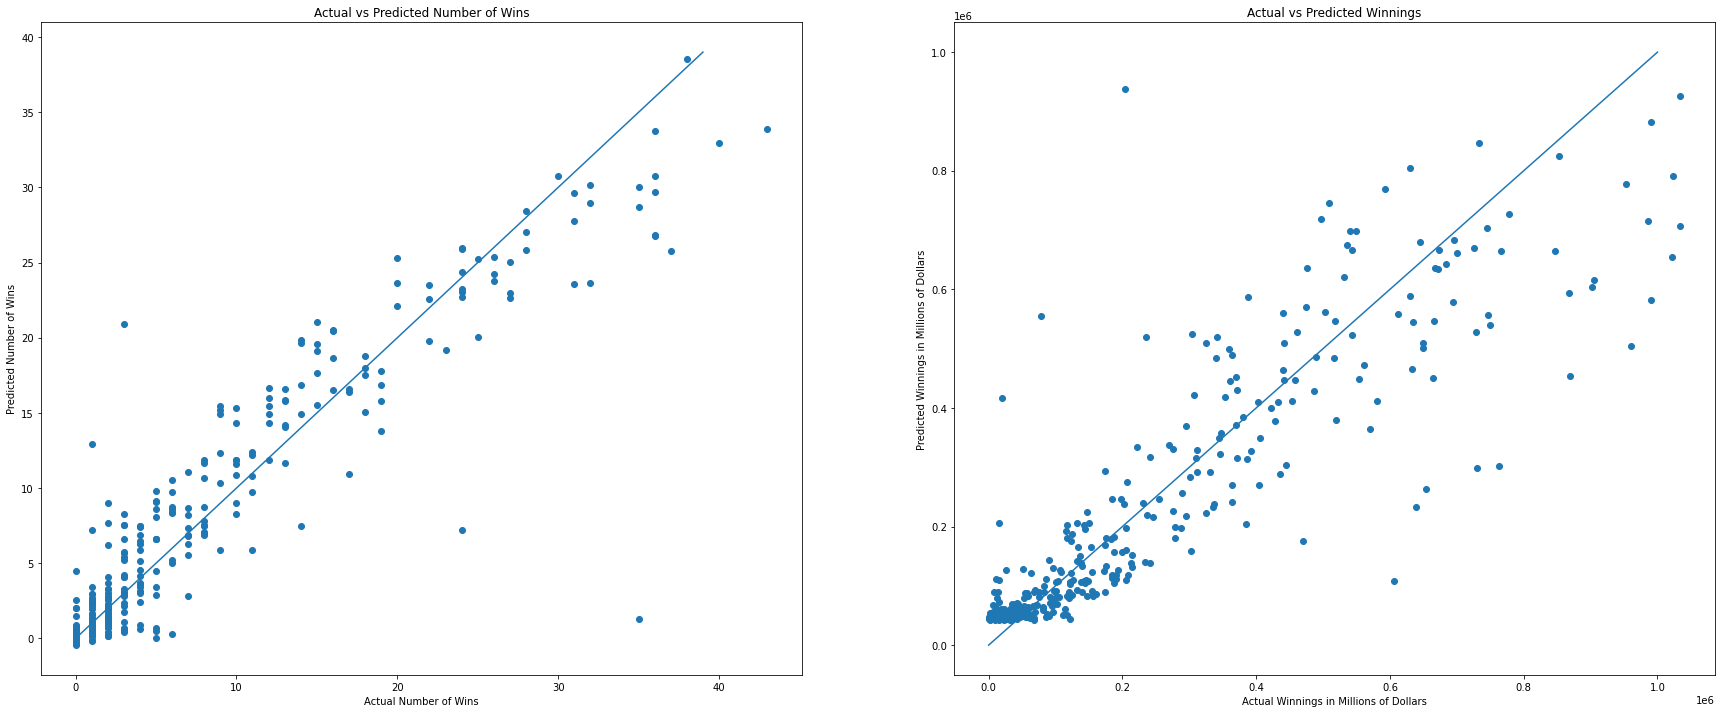

In [5]:
# As the Codecademy prompt suggests, we should first split our data into training and test data sets. The convention
# seems to be 80% training, 20% test so let's go with that for now.

# Drat, forgot that I'll need to reshape the arrays before I can pass them to train_test_split. Let's do that now:

win_x = tennis_stats[['ServiceGamesPlayed']] # test score: 0.87
win_y = tennis_stats[['Wins']]

ing_x = tennis_stats[['BreakPointsOpportunities']] # test score: 0.78
ing_y = tennis_stats[['Winnings']]

x_w_train, x_w_test, y_w_train, y_w_test = train_test_split(win_x, win_y, \
                                                            train_size = 0.8, test_size = 0.2, random_state = 0)

x_g_train, x_g_test, y_g_train, y_g_test = train_test_split(ing_x, ing_y, \
                                                            train_size = 0.8, test_size = 0.2, random_state = 1)

# Now to build the linear regression models:

winlin = LinearRegression()
winlin.fit(x_w_train,y_w_train)
win_lin_predict = winlin.predict(x_w_test)

winningslin = LinearRegression()
winningslin.fit(x_g_train, y_g_train)
winnings_lin_predict = winningslin.predict(x_g_test)

# How does the model perform? That is to say, What is the coefficient of determination of the prediction?

train_w_score = winlin.score(x_w_train, y_w_train)
test_w_score = winlin.score(x_w_test, y_w_test)
train_g_score = winningslin.score(x_g_train, y_g_train)
test_g_score = winningslin.score(x_g_test, y_g_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score, test_w_score))
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score, test_g_score))

# And finally, to do the prompted plot:

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(y_w_test, win_lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(y_g_test, winnings_lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

The one-variable linear regression model for Wins clearly deviates from the expected y = x line at large numbers of wins, but the scatter at smaller numbers of wins isn't incredibly large. There's clearly more scatter in the one-variable linear regression model for Winnings, with big deviations at large winnings (i.e., yearly earnings). While one can sort of see some vague convergence to the y = x line at small win numbers for the Wins linear regression model, that does not seem to be the case for the Winnings linear regression model.

<font color = green>
============================================================================================================ <br>
Codecademy Prompt: Single Linear Regression, Other Columns 
<br>
Create a few more linear regression models that use one feature to predict one of the outcomes.
Which model that you create is the best?
============================================================================================================ 
</font>

In [6]:
# We will once again split our data into training and test data sets. And, I'm going to try every non-"percentage of
# the time" column, just in case my eye is biased by what it perceives to be a good fit.

# First let's do this for the Wins column:

win_x_2 = tennis_stats[['ReturnGamesPlayed']] # test score: 0.87
win_y_2 = tennis_stats[['Wins']] 

#win_x_2 = tennis_stats[['BreakPointsOpportunities']] # test score: 0.86
#win_y_2 = tennis_stats[['Wins']] 

#win_x_2 = tennis_stats[['BreakPointsFaced']] # test score: 0.77
#win_y_2 = tennis_stats[['Wins']] 

#win_x_2 = tennis_stats[['Losses']] # test score: 0.75
#win_y_2 = tennis_stats[['Wins']] 

#win_x_2 = tennis_stats[['DoubleFaults']] # test score: 0.70
#win_y_2 = tennis_stats[['Wins']] 

#win_x_2 = tennis_stats[['Aces']] # test score: 0.58
#win_y_2 = tennis_stats[['Wins']] 

# I've kept in the code for everything I tested, but only the model with the highest coefficient of determination
# is un-commented.

# Building the appropriate linear model,

x_w_train_2, x_w_test_2, y_w_train_2, y_w_test_2 = train_test_split(win_x_2, win_y_2, \
                                                            train_size = 0.8, test_size = 0.2, random_state = 0)

winlin2 = LinearRegression()
winlin2.fit(x_w_train_2,y_w_train_2)
win_lin_predict_2 = winlin2.predict(x_w_test_2)

# Determining the model's performance:

train_w_score_2 = winlin2.score(x_w_train_2, y_w_train_2)
test_w_score_2 = winlin2.score(x_w_test_2, y_w_test_2)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_2, test_w_score_2))

#-----------------------------------------------------------------------

# Now let's do the exact same thing for the Winnings column. Again, all tested columns are included in my code, but 
# only the column with the highest coefficient of determination is not commented out.

ing_x_2 = tennis_stats[['ReturnGamesPlayed']] # test score: 0.80
ing_y_2 = tennis_stats[['Winnings']] #

#ing_x_2 = tennis_stats[['ServiceGamesPlayed']] # test score: 0.80
#ing_y_2 = tennis_stats[['Winnings']] #

#ing_x_2 = tennis_stats[['Losses']] # test score: 0.72
#ing_y_2 = tennis_stats[['Winnings']] #

#ing_x_2 = tennis_stats[['BreakPointsFaced']] # test score: 0.71
#ing_y_2 = tennis_stats[['Winnings']] #

#ing_x_2 = tennis_stats[['DoubleFaults']] # test score: 0.67
#ing_y_2 = tennis_stats[['Winnings']] #

#ing_x_2 = tennis_stats[['Aces']] # test score: 0.58
#ing_y_2 = tennis_stats[['Winnings']] #

# Again building the appropriate model:

x_g_train_2, x_g_test_2, y_g_train_2, y_g_test_2 = train_test_split(ing_x_2, ing_y_2, \
                                                            train_size = 0.8, test_size = 0.2, random_state = 1)

winningslin2 = LinearRegression()
winningslin2.fit(x_g_train_2, y_g_train_2)
winnings_lin_predict_2 = winningslin2.predict(x_g_test_2)

# Determining the model's performance:

train_g_score_2 = winningslin2.score(x_g_train_2, y_g_train_2)
test_g_score_2 = winningslin2.score(x_g_test_2, y_g_test_2)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_2, test_g_score_2))

Wins training score: 0.860557319712679, Wins test score: 0.8675623118927358
Winnings training score: 0.8404391282150621, Winnings test score: 0.8025590150754572


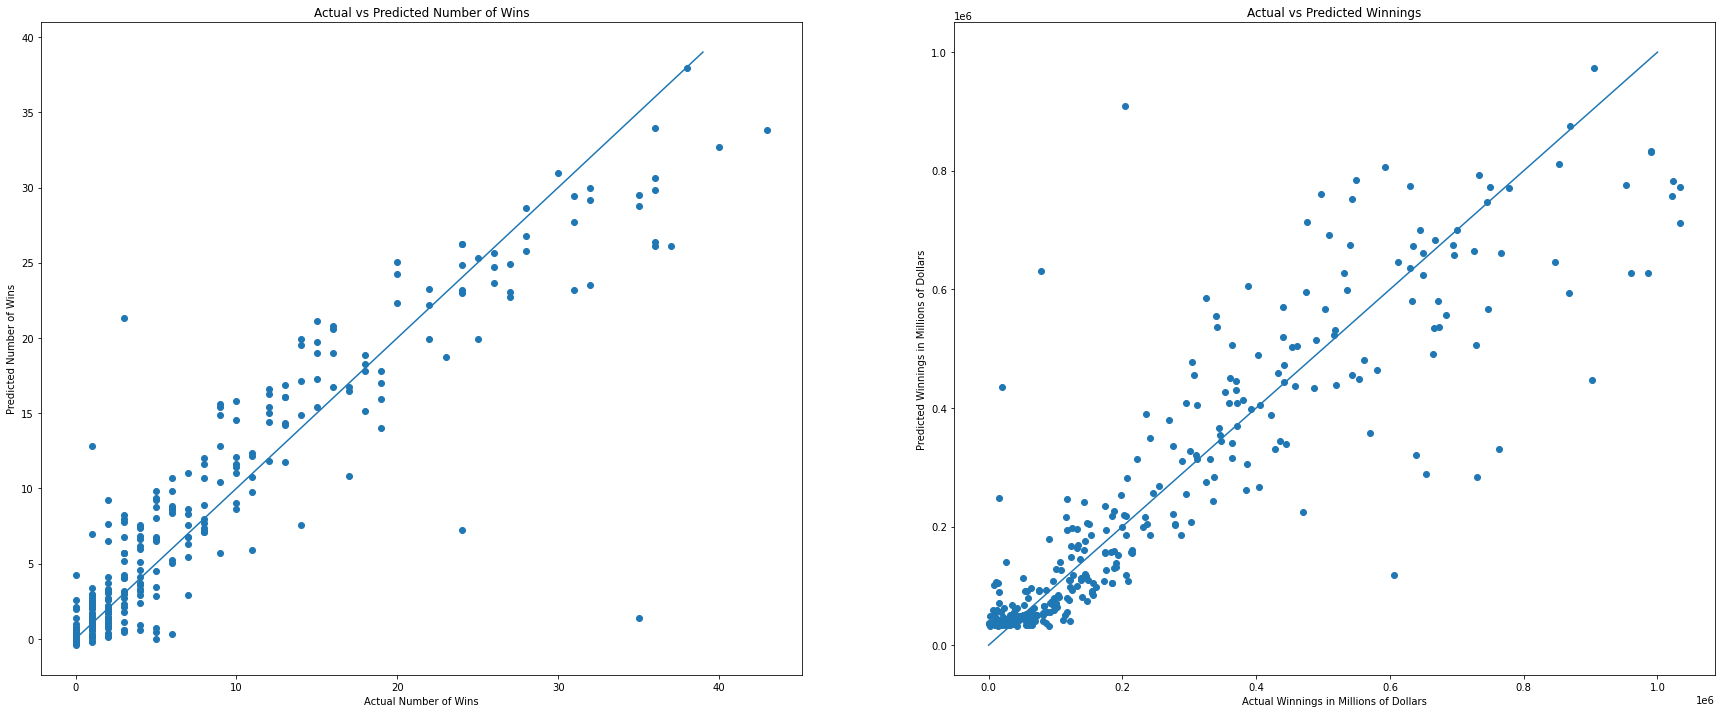

In [7]:
# And finally, to make a plot of actual vs. predicted Wins, as well as a plot of actual vs. predicted Winnings, to
# better visualize how our model is performing:

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(y_w_test_2, win_lin_predict_2)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(y_g_test_2, winnings_lin_predict_2)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

The ReturnGamesPlayed one-variable linear regression model for Wins doesn't deviate quite as clearly from the expected y = x line at large numbers of wins as the ServiceGamesPlayed one-variable linear regression model. However, the scatter at lower numbers of wins looks by eye to be a bit bigger. <br>
The scatter in the ReturnGamesPlayed one-variable linear regression model for Winnings is still big, but it seems to be more symmetric about the y = x line than it was for the BreakPointOpportunities one-variable linear regression model.

<font color = green>
============================================================================================================ <br>
Codecademy prompt: Multiple Linear Regression Models
<br>
Create a few linear regression models that use two features to predict yearly earnings. <br>
Which set of two features results in the best model?
============================================================================================================ 
</font>

In [8]:
# Believe it or not, I tried every single combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed',
# 'BreakPointsOpporunities', 'Aces', 'BreakPointsFaced', 'DoubleFaults', and 'Losses' to determine which two features
# resulted in the best model for predicting Wins. Rather than show the commented out lines for all 17 combinations, 
# and the resulting coefficient of determination scores, I'll just keep the two columns which resulted in the 
# highest test score:

win_xx = tennis_stats[['BreakPointsOpportunities','Aces']] # test score: 0.89
win_yy = tennis_stats[['Wins']]

# Building the appropriate model:
xx_w_train, xx_w_test, yy_w_train, yy_w_test = train_test_split(win_xx, win_yy, train_size = 0.8, \
                                                                test_size = 0.2, random_state = 0)

win2lf = LinearRegression()
win2lf.fit(xx_w_train,yy_w_train)
win_2lin_predict = win2lf.predict(xx_w_test)

# Determining the test score:

train_w_score_12 = win2lf.score(xx_w_train, yy_w_train)
test_w_score_12 = win2lf.score(xx_w_test, yy_w_test)
print('Wins training score: {}, Wins test score: {}'.format(train_w_score_12, test_w_score_12))

#----------------------------------------------------------------------------------------------

# Just as I did with the Wins column, I tried every single combination of the columns 'ServiceGamesPlayed', 
# 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces', 'BreakPointsFaced', 'DoubleFaults', and 'Losses' to 
# determine which two features resulted in the best model for predicting Winnings. Rather than show the commented out
# lines for all 17 combinations, and the resulting coefficient of determination scores, I'll just keep the two columns 
# which resulted in the highest test score:

ing_xx = tennis_stats[['ServiceGamesPlayed','BreakPointsFaced']] # test score: 0.808
ing_yy = tennis_stats[['Winnings']]

# Building the appropriate model:
xx_g_train, xx_g_test, yy_g_train, yy_g_test = train_test_split(ing_xx, ing_yy, train_size = 0.8, \
                                                                test_size = 0.2, random_state = 1)

winnings2lf = LinearRegression()
winnings2lf.fit(xx_g_train, yy_g_train)
winnings_2lin_predict = winnings2lf.predict(xx_g_test)

# Testing the model:

train_g_score_12 = winnings2lf.score(xx_g_train, yy_g_train)
test_g_score_12 = winnings2lf.score(xx_g_test, yy_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_12, test_g_score_12))

Wins training score: 0.8754638703320046, Wins test score: 0.8942328316861486
Winnings training score: 0.8424473923454435, Winnings test score: 0.8078734126339571


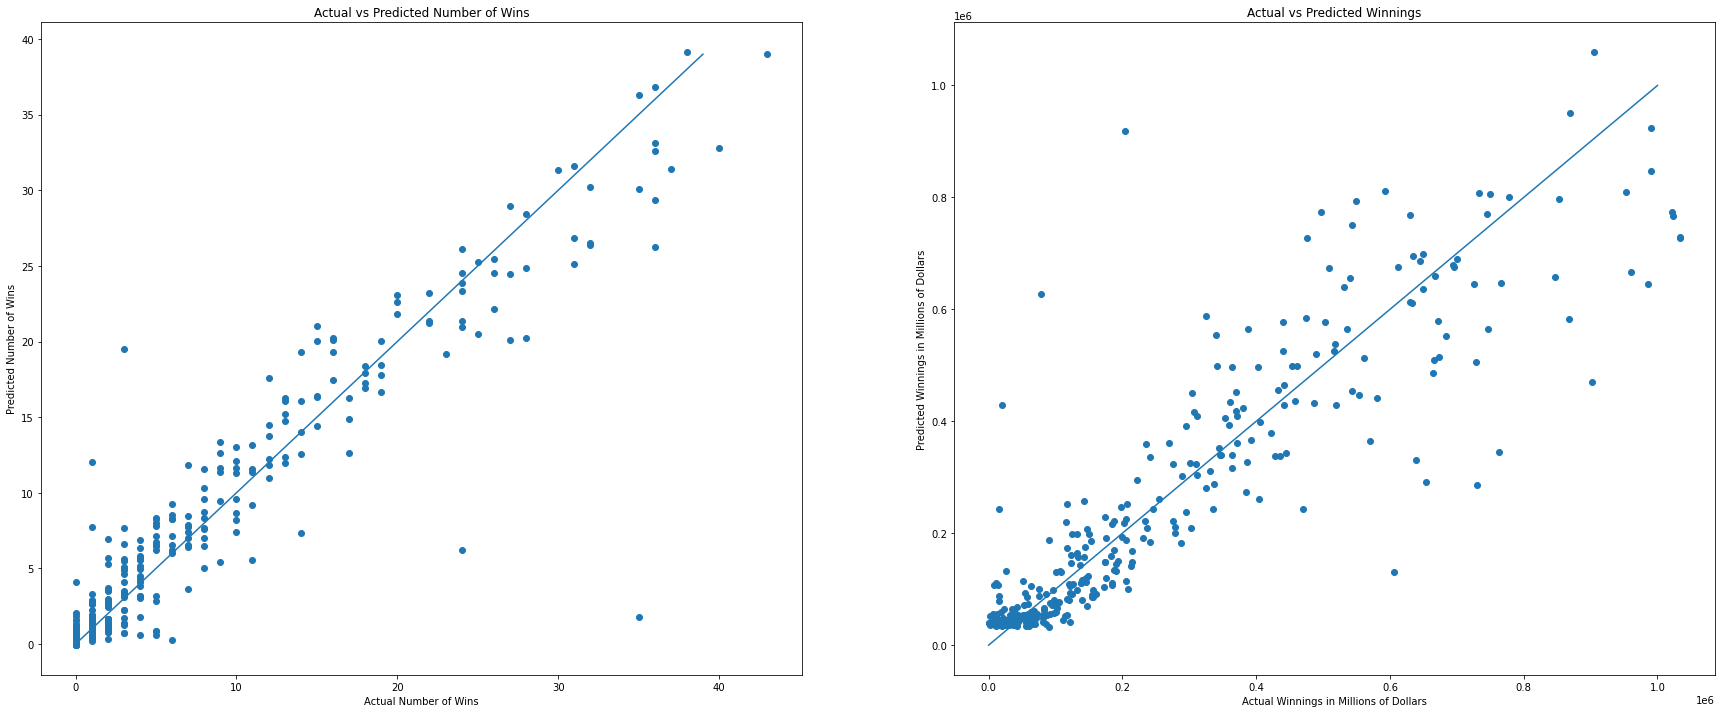

In [9]:
# And finally, to make a plot of actual vs. predicted Wins, as well as a plot of actual vs. predicted Winnings, to
# better visualize how our model is performing:

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(yy_w_test, win_2lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(yy_g_test, winnings_2lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

First of all, it's very interesting to me that the best two-variable linear regression model for predicting both Wins and Winnings did not include the variable which produced the best one-variable linear regression model. 

For the Wins two-variable linear regression model, we can clearly see convergence to the y = x line starting to happen. There's a couple of outliers at big numbers of actual wins, but the scatter is otherwise relatively low and there's not as noticable of an underestimate of big numbers of actual wins at the "high end" of the model. 

There's still a great deal of scatter in the Winnings two-variable linear regression model, but it looks to have converged a bit more to the y = x line than the one-variable linear regression model did. 

<font color = green>
============================================================================================================ <br>
Codecademy Prompt: Multiple multi-Linear Regression Models <br>
Create a few linear regression models that use multiple features to predict yearly earnings. <br>
Which set of features results in the best model?
============================================================================================================ <br>
</font>

In [10]:
# Since I've already done so much with the Wins column, I will build multiple linear regression models for both
# Wins AND Winnings (i.e., yearly earnings).

# First up, a 3-variable model fit for Wins. I tried what I believe to be every combination of the columns 
# 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces', 'BreakPointsFaced', 'DoubleFaults',
# and 'Losses', and the combination with the highest test score was:

win_xxx = tennis_stats[['ServiceGamesPlayed','BreakPointsOpportunities','BreakPointsFaced']] # test score: 0.90602
win_yyy = tennis_stats[['Wins']]

xxx_w_train, xxx_w_test, yyy_w_train, yyy_w_test = train_test_split(win_xxx, win_yyy, train_size = 0.8, \
                                                                    test_size = 0.2, random_state = 0)

win3lf = LinearRegression()
win3lf.fit(xxx_w_train,yyy_w_train)
win_3lin_predict = win3lf.predict(xxx_w_test)

train_w_score_13 = win3lf.score(xxx_w_train, yyy_w_train)
test_w_score_13 = win3lf.score(xxx_w_test, yyy_w_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_13, test_w_score_13))

#----------------------------------------------------------------------------------------------

# And now for a 3-variable model fit for Winnings. Just like I did for the Wins column, I tried what I believe to be
# every combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces',
# 'BreakPointsFaced', 'DoubleFaults', and 'Losses', and the combination with the highest test score was:

ing_xxx = tennis_stats[['ServiceGamesPlayed','BreakPointsOpportunities','BreakPointsFaced']] # test score: 0.8151
ing_yyy = tennis_stats[['Winnings']]

xxx_g_train, xxx_g_test, yyy_g_train, yyy_g_test = train_test_split(ing_xxx, ing_yyy, train_size = 0.8, \
                                                                    test_size = 0.2, random_state = 1)

winnings3lf = LinearRegression()
winnings3lf.fit(xxx_g_train, yyy_g_train)
winnings_3lin_predict = winnings3lf.predict(xxx_g_test)

train_g_score_13 = winnings3lf.score(xxx_g_train, yyy_g_train)
test_g_score_13 = winnings3lf.score(xxx_g_test, yyy_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_13, test_g_score_13))

Wins training score: 0.8793978706172156, Wins test score: 0.9060242395761048
Winnings training score: 0.8456220652943645, Winnings test score: 0.8150856351305459


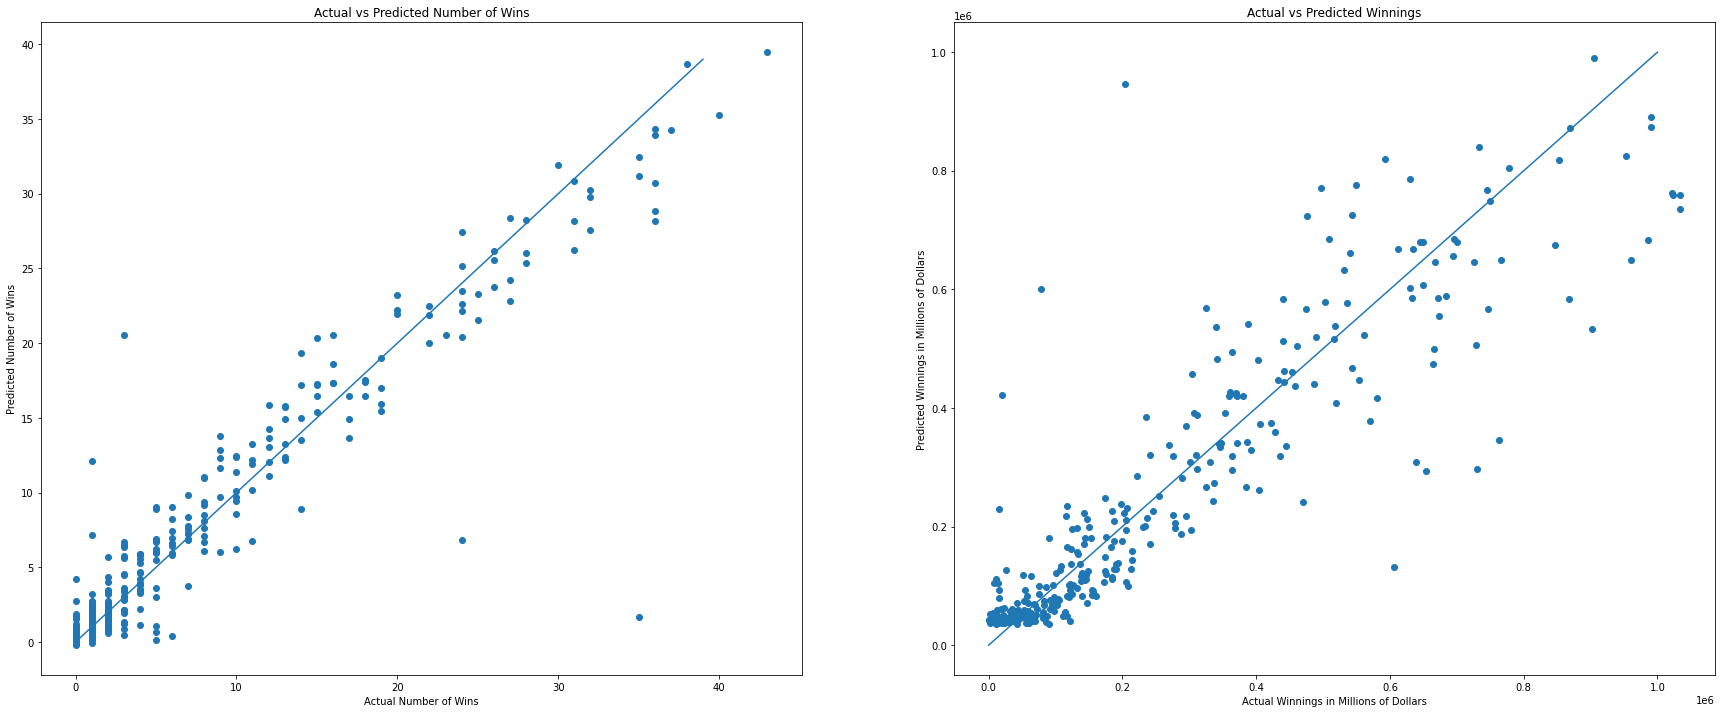

In [11]:
# Let's see how our three-variable linear regression models are performing:

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(yyy_w_test, win_3lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(yyy_g_test, winnings_3lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

Looking at the Wins three-variable linear regression model first, there seems to be a bit more convergence on the y = x line than there was for the two-variable model and the scatter about the line has been reduced. There are still a few noticeable outliers in the lower-middle of the plot, though. It's not surprising to me that the model is getting better at predicting Wins the more variables we give it, as it is analogous to including more terms in a Taylor expansion to better estimate the value of a function at a particular point. Generally speaking, the more degrees of freedom in your model, the better a job it's going to do. The key, at least in physics, to building a good model is to include the fewest number of degrees of freedom possible. <br>
Looking at the Winnings three-variable linear regression model, there's still a high-scatter cloud at high actual winnings, but the model seems to be a tiny bit better than the two-variable model at smaller actual winnings.

In [12]:
# Now for a 4-variable model fit for Wins. I tried what I believe to be every combination of the columns 
# 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces', 'BreakPointsFaced', 'DoubleFaults',
# and 'Losses', and the combination with the highest test score was:

win_xxxx = tennis_stats[['BreakPointsOpportunities', 'Aces','BreakPointsFaced','Losses' ]] 
win_yyyy = tennis_stats[['Wins']] # test score: 0.9153


xxxx_w_train, xxxx_w_test, yyyy_w_train, yyyy_w_test = train_test_split(win_xxxx, win_yyyy, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 0)

win4lf = LinearRegression()
win4lf.fit(xxxx_w_train,yyyy_w_train)
win_4lin_predict = win4lf.predict(xxxx_w_test)

train_w_score_14 = win4lf.score(xxxx_w_train, yyyy_w_train)
test_w_score_14 = win4lf.score(xxxx_w_test, yyyy_w_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_14, test_w_score_14))

#----------------------------------------------------------------------------------------------

# And now for a 4-variable model fit for Winnings. Just like I did for the Wins column, I tried what I believe to be
# every combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces',
# 'BreakPointsFaced', 'DoubleFaults', and 'Losses', and the combination with the highest test score was:

#------------

ing_xxxx = tennis_stats[['BreakPointsOpportunities', 'Aces', 'BreakPointsFaced', 'Losses']] 
ing_yyyy = tennis_stats[['Winnings']] # test score: 0.82015

xxxx_g_train, xxxx_g_test, yyyy_g_train, yyyy_g_test = train_test_split(ing_xxxx, ing_yyyy, train_size = 0.8, \
                                                                        test_size = 0.2, random_state = 1)

winnings4lf = LinearRegression()
winnings4lf.fit(xxxx_g_train, yyyy_g_train)
winnings_4lin_predict = winnings4lf.predict(xxxx_g_test)

train_g_score_14 = winnings4lf.score(xxxx_g_train, yyyy_g_train)
test_g_score_14 = winnings4lf.score(xxxx_g_test, yyyy_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_14, test_g_score_14))

Wins training score: 0.8948027555097006, Wins test score: 0.9152576588277586
Winnings training score: 0.8521300929716353, Winnings test score: 0.8201549564035103


It's quite interesting to me that, for the four-variable linear regression model to predict both Wins and Winnings, the same 4 independent variables yield the best model. That model works better for Wins than for Winnings, but it looks as though we've found four of the underlying factors that tend to predict good tennis performance.

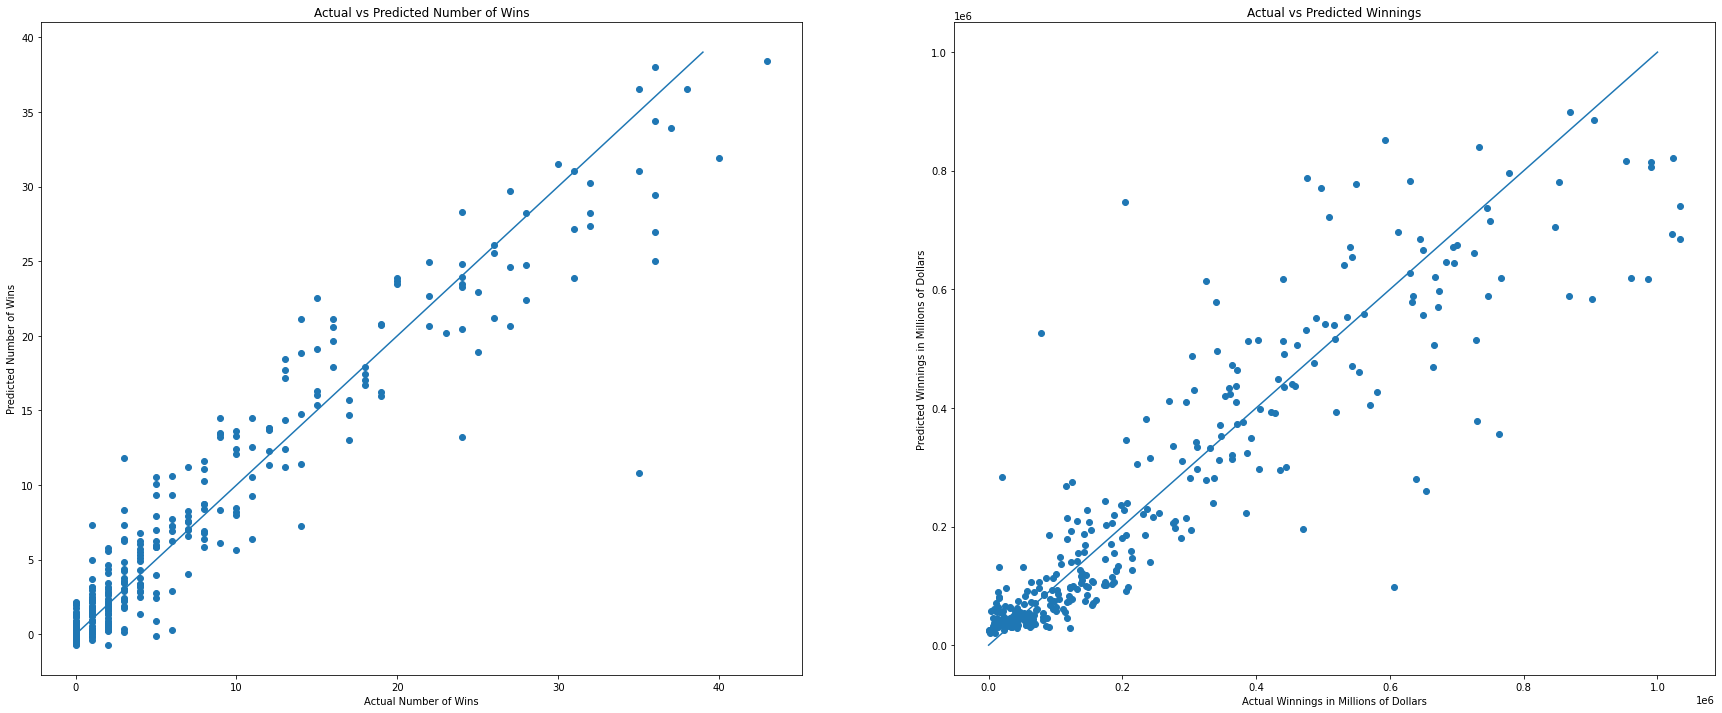

In [13]:
# Let's see how our four-variable linear regression models are performing:

plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(yyyy_w_test, win_4lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(yyyy_g_test, winnings_4lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

In the four-variable linear regression model for Wins, some of the outliers have gotten a bit closer to the y = x line, and there's a bit more scatter at the high-wins end of the model. But the bulk of the trend and convergence to the y = x line is the same as it was for the three-variable linear regression model.<br>
A similar trend is true for the four-variable linear regression model for Winnings. Some of the outliers are a bit closer to the y = x line, but the scatter hasn't gone down all that much and the general convergence to the y = x line is about the same as it was for the three-variable linear regression model.

In [14]:
# Now for a 5-variable model fit for Wins. I tried what I believe to be every combination of the columns 
# 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces', 'BreakPointsFaced', 'DoubleFaults',
# and 'Losses', and the combination with the highest test score was:

win_x5 = tennis_stats[['ServiceGamesPlayed', 'BreakPointsOpportunities', 'Aces', 'BreakPointsFaced','Losses']] 
win_y5 = tennis_stats[['Wins']] # test score: 0.91561

x5_w_train, x5_w_test, y5_w_train, y5_w_test = train_test_split(win_x5, win_y5, train_size = 0.8, \
                                                                test_size = 0.2, random_state = 0)

win5lf = LinearRegression()
win5lf.fit(x5_w_train,y5_w_train)
win_5lin_predict = win5lf.predict(x5_w_test)

train_w_score_15 = win5lf.score(x5_w_train, y5_w_train)
test_w_score_15 = win5lf.score(x5_w_test, y5_w_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_15, test_w_score_15))

#----------------------------------------------------------------------------------------------

# Now for a 5-variable model fit for Winnings. Just like I did for the Wins column, I tried what I believe to be
# every combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 'Aces',
# 'BreakPointsFaced', 'DoubleFaults', and 'Losses', and the combination with the highest test score was:

ing_x5 = tennis_stats[['ServiceGamesPlayed', 'BreakPointsOpportunities', 'Aces','BreakPointsFaced',\
                          'Losses']]  # test score: 0.82238
ing_y5 = tennis_stats[['Winnings']] 

x5_g_train, x5_g_test, y5_g_train, y5_g_test = train_test_split(ing_x5, ing_y5, train_size = 0.8, \
                                                               test_size = 0.2, random_state = 1)
 
winnings5lf = LinearRegression()
winnings5lf.fit(x5_g_train, y5_g_train)
winnings_5lin_predict = winnings5lf.predict(x5_g_test)

train_g_score_15 = winnings5lf.score(x5_g_train, y5_g_train)
test_g_score_15 = winnings5lf.score(x5_g_test, y5_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_15, test_g_score_15))

Wins training score: 0.8953129018051257, Wins test score: 0.9156126395419211
Winnings training score: 0.8554159520113522, Winnings test score: 0.8223781225701428


The five-variable linear regression model's coefficient of determination is higher than the coefficient of determination of the four-variable linear regression model for both Wins and Winnings, but in each case the increase in determination coefficient is not much. I'll have more to say about that later, but in the meanwhile let's take a look at how these models did and get started on a six-variable linear regression model.

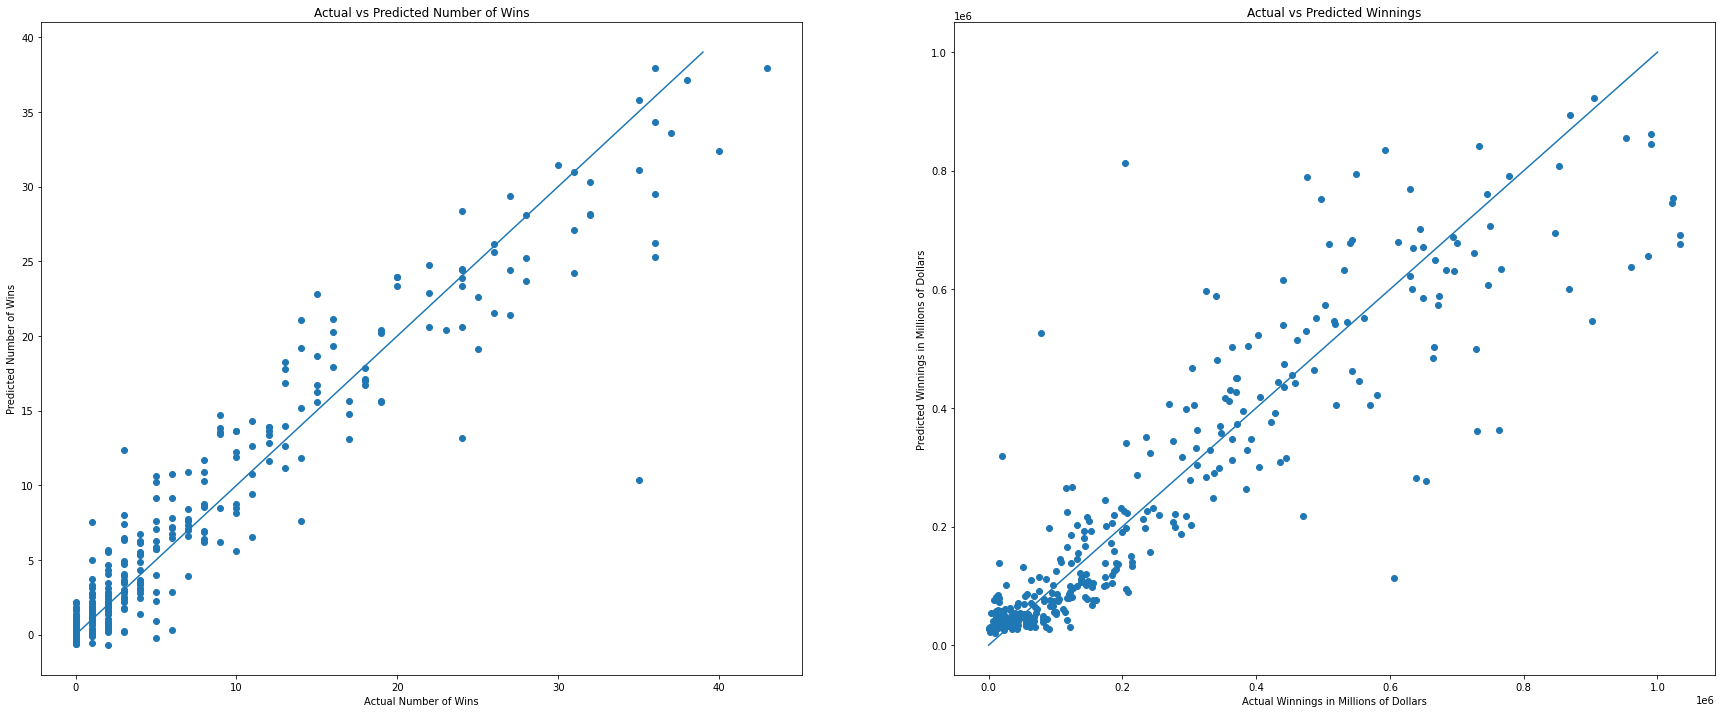

In [15]:
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(y5_w_test, win_5lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(y5_g_test, winnings_5lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

To my eye at least, not much has changed between these plots and those for the four-variable linear regression models of Wins and Winnings.

In [16]:
# Almost done. Let's build the best 6-variable linear regression model for Wins that we can. After trying what I 
# believe to be every combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 
# 'Aces', 'BreakPointsFaced', 'DoubleFaults', and 'Losses', and the combination with the highest test score was:

win_x6 = tennis_stats[['ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpportunities', 'Aces',\
                         'BreakPointsFaced', 'Losses']] # test score: 919402
win_y6 = tennis_stats[['Wins']] 

x6_w_train, x6_w_test, y6_w_train, y6_w_test = train_test_split(win_x6, win_y6, train_size = 0.8, \
                                                                test_size = 0.2, random_state = 0)

win6lf = LinearRegression()
win6lf.fit(x6_w_train,y6_w_train)
win_6lin_predict = win6lf.predict(x6_w_test)

train_w_score_16 = win6lf.score(x6_w_train, y6_w_train)
test_w_score_16 = win6lf.score(x6_w_test, y6_w_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_16, test_w_score_16))

#----------------------------------------------------------------------------------------------

# Now let's build the best 6-variable linear regression model for Winnings that we can. After trying what I 
# believe to be every combination of the columns 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpporunities', 
# 'Aces', 'BreakPointsFaced', 'DoubleFaults', and 'Losses', and the combination with the highest test score was:

#------------

ing_x6 = tennis_stats[['ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpportunities', 'Aces',\
                         'BreakPointsFaced', 'Losses']]  # test score: 0.8234
ing_y6 = tennis_stats[['Winnings']] 

x6_g_train, x6_g_test, y6_g_train, y6_g_test = train_test_split(ing_x6, ing_y6, train_size = 0.8, \
                                                               test_size = 0.2, random_state = 1)
 
winnings6lf = LinearRegression()
winnings6lf.fit(x6_g_train, y6_g_train)
winnings_6lin_predict = winnings6lf.predict(x6_g_test)

train_g_score_16 = winnings6lf.score(x6_g_train, y6_g_train)
test_g_score_16 = winnings6lf.score(x6_g_test, y6_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_16, test_g_score_16))

Wins training score: 0.8961706352896863, Wins test score: 0.9194024281425511
Winnings training score: 0.8556677161024637, Winnings test score: 0.8234353396180728


Again, not much improvement from the five-variable linear regression model to the six-variable linear regression model, for either Wins or Winnings. Let's again have a look at the actual vs. predicted Wins and actual vs. predicted Winnings just to see if our eye can detect any difference between these six-variable linear regression models and the five-variable ones:

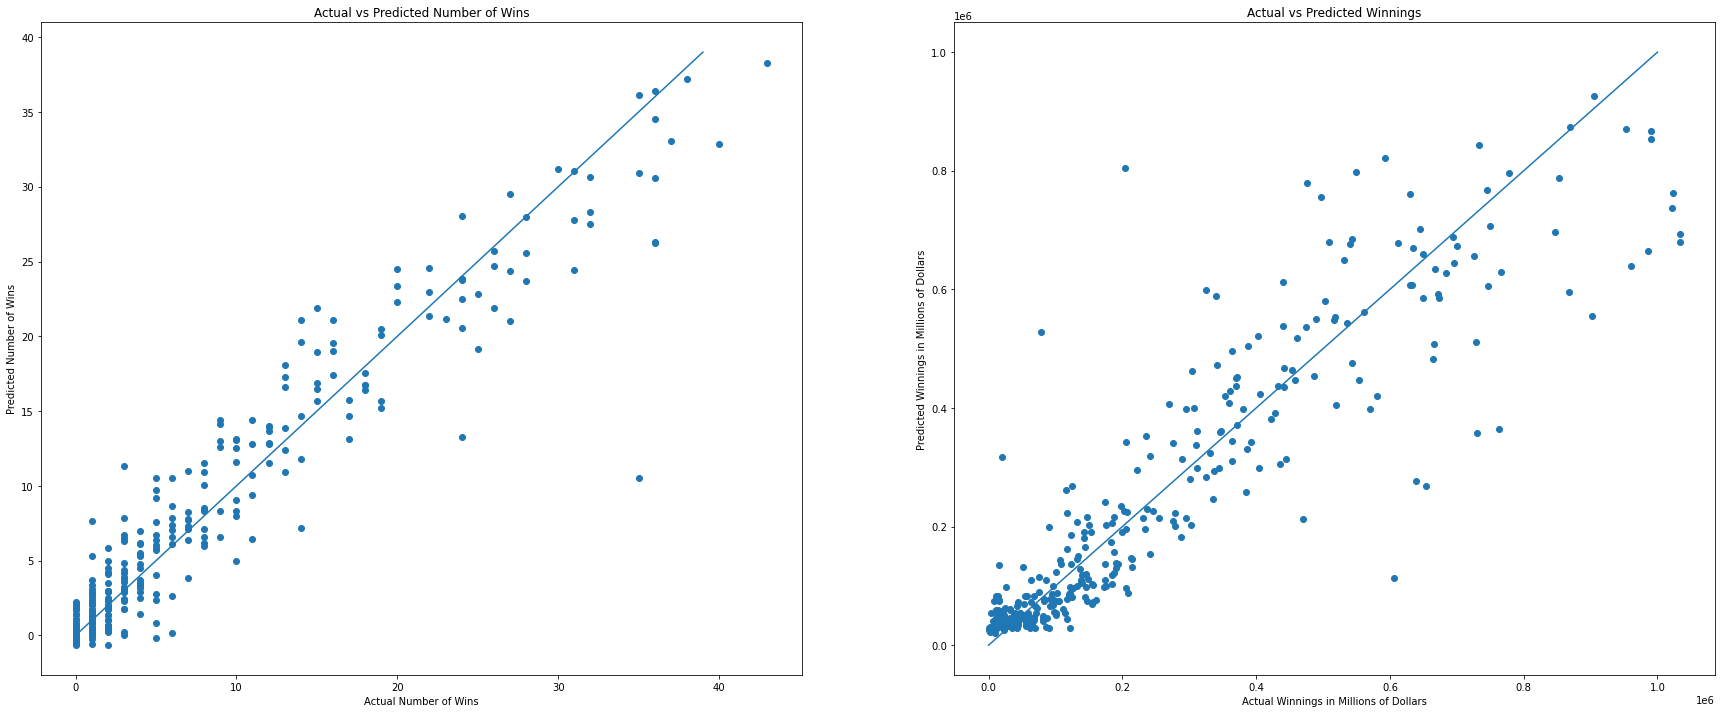

In [17]:
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(y6_w_test, win_6lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(y6_g_test, winnings_6lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

Nope. <br>
Although visually, the high end of the Winnings model may be doing a teeny bit worse than it did before. Maybe.

In [18]:
# For the sake of completeness, let's take our model exploration to its logical conclusion and see what the full 
# 7-variable linear regression model for Wins:

win_x7 = tennis_stats[['ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpportunities', 'Aces',\
                         'BreakPointsFaced', 'DoubleFaults','Losses']] 
win_y7 = tennis_stats[['Wins']] 


x7_w_train, x7_w_test, y7_w_train, y7_w_test = train_test_split(win_x7, win_y7, train_size = 0.8, \
                                                                test_size = 0.2, random_state = 0)

win7lf = LinearRegression()
win7lf.fit(x7_w_train,y7_w_train)
win_7lin_predict = win7lf.predict(x7_w_test)

train_w_score_17 = win7lf.score(x7_w_train, y7_w_train)
test_w_score_17 = win7lf.score(x7_w_test, y7_w_test)

print('Wins training score: {}, Wins test score: {}'.format(train_w_score_17, test_w_score_17))

#----------------------------------------------------------------------------------------------

# Here's the full 7-variable linear regression model for Winnings:

ing_x7 = tennis_stats[['ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsOpportunities', 'Aces',\
                         'BreakPointsFaced', 'DoubleFaults','Losses']]  
ing_y7 = tennis_stats[['Winnings']] 

x7_g_train, x7_g_test, y7_g_train, y7_g_test = train_test_split(ing_x7, ing_y7, train_size = 0.8, \
                                                               test_size = 0.2, random_state = 1)
 
winnings7lf = LinearRegression()
winnings7lf.fit(x7_g_train, y7_g_train)
winnings_7lin_predict = winnings7lf.predict(x7_g_test)

train_g_score_17 = winnings7lf.score(x7_g_train, y7_g_train)
test_g_score_17 = winnings7lf.score(x7_g_test, y7_g_test)
print('Winnings training score: {}, Winnings test score: {}'.format(train_g_score_17, test_g_score_17))

Wins training score: 0.8968101320055399, Wins test score: 0.9195351766544969
Winnings training score: 0.8579279248520301, Winnings test score: 0.8214657161716273


There's barely any difference between these coefficient of determination scores and the ones for the six-variable linear regression models. Actually, it looks as though the Winnings seven-variable linear regression model is doing a tiny bit <i>worse</i> than the six-variable linear regression model! <br>
Let's again have a look at the actual vs. predicted plots:

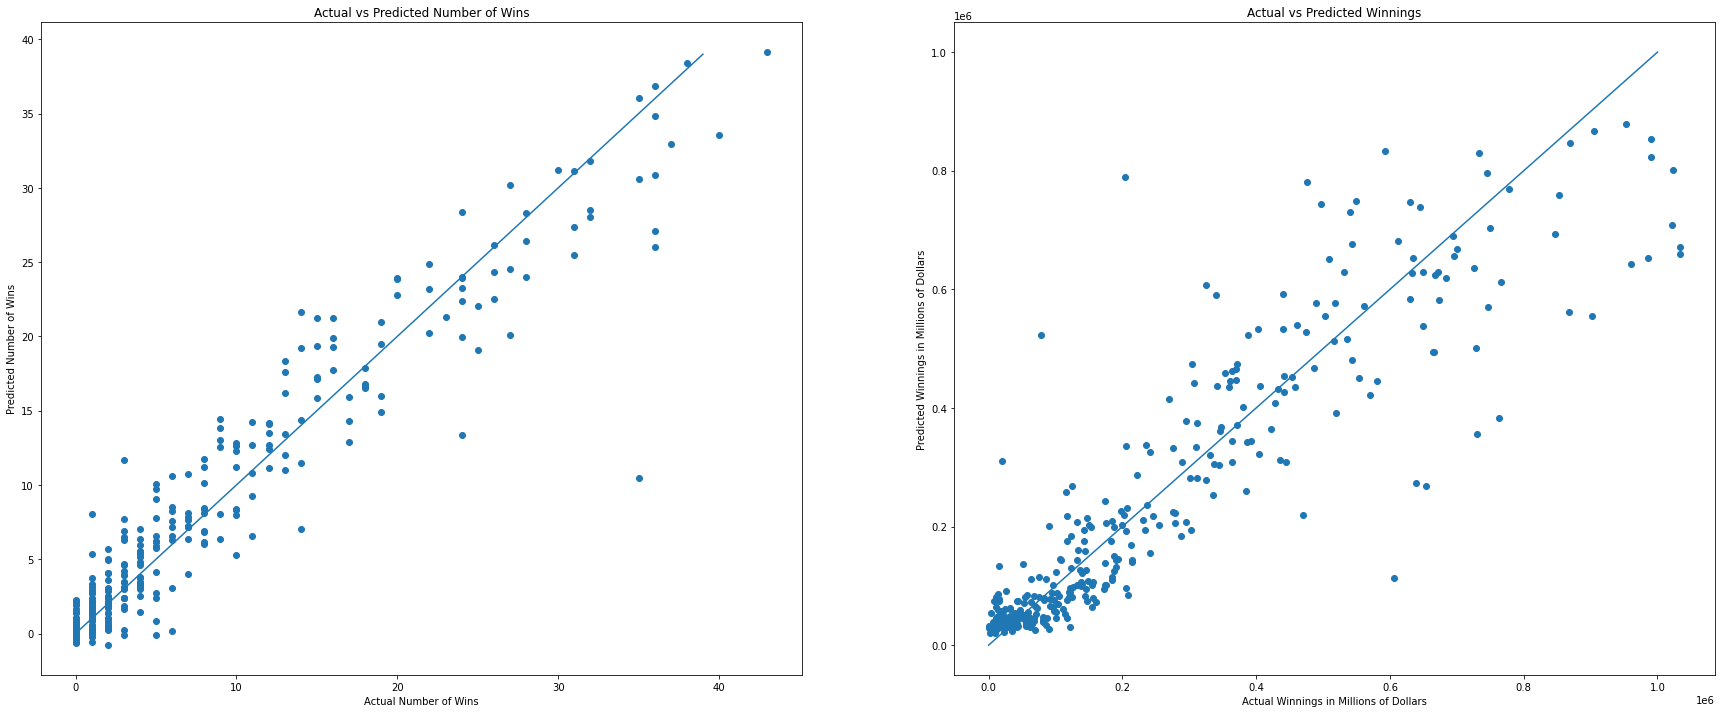

In [19]:
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
plt.scatter(y7_w_test, win_7lin_predict)
plt.xlabel("Actual Number of Wins")
plt.ylabel("Predicted Number of Wins")
plt.title("Actual vs Predicted Number of Wins")
plt.plot(range(40), range(40))
plt.subplot(1,2,2)
plt.scatter(y7_g_test, winnings_7lin_predict)
plt.xlabel("Actual Winnings in Millions of Dollars")
plt.ylabel("Predicted Winnings in Millions of Dollars")
plt.title("Actual vs Predicted Winnings")
plt.plot(range(1000000), range(1000000))

Ditto my comments from the previous comparison. I note that the high end of the Winnings model seems to be doing even worse in the seven-variable linear regression model than it did in the six-variable linear regression model.

<font color = green>
============================================================================================================ <br>
Codecademy question: Which set of features results in the best model?
============================================================================================================ <br>
</font>
I think what I'm supposed to say here is that my seven-variable linear regression model, whose independent variables were ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, Aces, BreakPointsFaced, DoubleFaults, and Losses is the answer, at least if you're trying to predict Wins. If you're trying to predict Winnings, it was the six-variable linear regression model whose independent variables were ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, Aces, BreakPointsFaced, and Losses. I think I'm supposed to say that these linear regression models are the best because they resulted in the highest coefficient of determination, and since that is the metric by which we are judging a good model the two models I listed must be the answer.<br>

However, I'm going to go into some nuance here. It took an awful long dang time to go through every combination of the seven variables ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, Aces, BreakPointsFaced, DoubleFaults, and Losses to find the best three-, four-, and five-variable linear regression models for Wins and Winnings, and even though the six- and seven-variable models didn't take long to create they still took time. In the end, as a result of all that investigation, how much better did my models actually get by adding another variable? How much metaphorical bang did I get for my metaphorical buck?<br>

Let's only consider the one-, two-, three-, four-, five-, and six-variable linear regression models which gave the highest coefficients of determination, a.k.a. the linear regression models that I have explicitly included in this notebook. How much bigger did coefficient of determination of the next model get over the previous one?<br>

First let's look at Wins:

variables in model &emsp; coefficient of determination &emsp; gain over previous model<br>
&emsp; &emsp; &emsp; &nbsp; 1 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8702 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; N/A<br>
&emsp; &emsp; &emsp; &nbsp; 2 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8942 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0240<br>
&emsp; &emsp; &emsp; &nbsp; 3 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.9060 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0118<br>
&emsp; &emsp; &emsp; &nbsp; 4 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.9153 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0093<br>
&emsp; &emsp; &emsp; &nbsp; 5 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.9156 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0003<br>
&emsp; &emsp; &emsp; &nbsp; 6 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.9194 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0038<br>
&emsp; &emsp; &emsp; &nbsp; 7 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.9195 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0001<br>

As you can see, there is a sharp drop-off in improvement after going from a four-variable model to a five-variable model. And, there was only a modest drop in improvement gain in going from three variables to four. So, in my mind at least, to get the biggest gain in predictive over the previous model, we could have realistically stopped at four variables. Sure the raw coefficient of determination numbers are better for five-, six-, and seven-variable models, but not much more so, and they took effort to find. A four variable model is the best one when considering not only model performance but effort and computational time in finding the model. <br>

For the sake of completeness, let's also consider how the coefficient of determination changes with the number of independent variables for Winnings:

variables in model &emsp; coefficient of determination &emsp; gain over previous model<br>
&emsp; &emsp; &emsp; &nbsp; 1 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.7791 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; N/A<br>
&emsp; &emsp; &emsp; &nbsp; 2 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8079 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0288<br>
&emsp; &emsp; &emsp; &nbsp; 3 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8151 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0072<br>
&emsp; &emsp; &emsp; &nbsp; 4 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8202 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0051<br>
&emsp; &emsp; &emsp; &nbsp; 5 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8224 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0022<br>
&emsp; &emsp; &emsp; &nbsp; 6 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8234 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.0010<br>
&emsp; &emsp; &emsp; &nbsp; 7 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; 0.8215 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &nbsp; -0.0109<br>
        
Note that here the model actually DID WORSE when we went from seven variables to six! So the work we did in building the seven-variable linear regression model was just wasted effort. And, there was a noticeable, steep drop-off after going from a two-variable model to a three-variable model. Given how noisy the data was, and the very modest gain in "goodness" of the model with additional independent variables, we could realistically have stopped after our two-variable model. It would've saved us a whole heck of a lot of effort, and the degredation in predictive power is only slight. <br>

Having read all of this, a fair question to ask is: If you suspected that constructing five-, six- and seven-variable linear regression models wasn't going to improve your model performance very much, why go through the effort to construct them? Isn't that just wasted effort? It was, but it was a calculated wasted effort. The goal of constructing the five-, six-, and seven-variable linear regression models was to ultimately quantitatively illustrate to the reader why they were a waste of effort. Or in other words, I was trying to show that I understand that you have to cut a model off somewhere, and motivate one possible way to know when to cut it off. I admit, I don't know if it's statistically the BEST way to know when to cut these models off, but it was A way. The situation is similar to making a measurement in physics: How many times do you need to measure a quantity in order to know with confidence what its average and standard deviation are? Why make 1,000 measurements when you could have only made 100? As it turns out, there is a good statistical answer to the measurement question, but that is a subject for a different Jupyter notebook.<br>

<font color = green>
============================================================================================================ <br>
Codecademy question: What features are most important for being a successful tennis player?
============================================================================================================ <br>
</font>
From the multi-variable linear regression models I constructed, it seems that scoring more points than your opponent is, unsurprisingly, the most important thing that a successful tennis player does. This manifests itself in the number of service games played, the number of return games played, the number of break points opportuntities, and the number of break points faced. As I interpret each of these features, they all say essentially that being in a position to send the ball to your opponent and have them be unable to send the ball back to you is vital to success in tennis. The more you can successfully convert break points, and win service and return games, the more successful you will be. Also, being able to serve the ball in such a way that your opponent can't return it -- that is to say, serve 'aces' -- is also an important factor in success. But yet, underlying all of these important features is one that paradoxically showed up as the "losses" column: number of games played. The more games you play, the more you win, and the more you lose. But the more games you play, the more you are able to practice serving and returning service in an actual game environment, and the better you are at these things the more likely you are to score points and win games. Of course, if you play a lot of games and win some of them, you are more likely to win more in earnings than someone who was just able to win a game or two. As they say, you have to play to win! So in conclusion, playing lots of games is the most important thing a successful tennis player does, but a close second is hitting the ball so that their opponent cannot return it over the net. The latter could either be in the form of serving aces, or in the form of having a stellar return game.